In [2]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

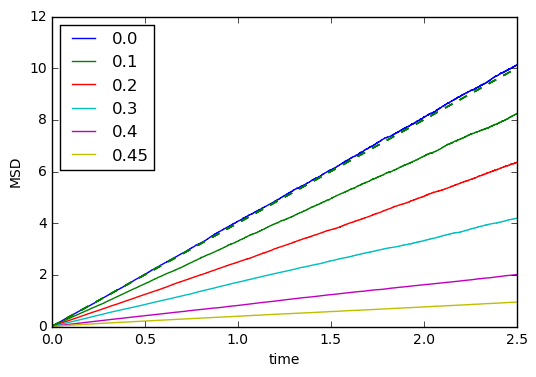

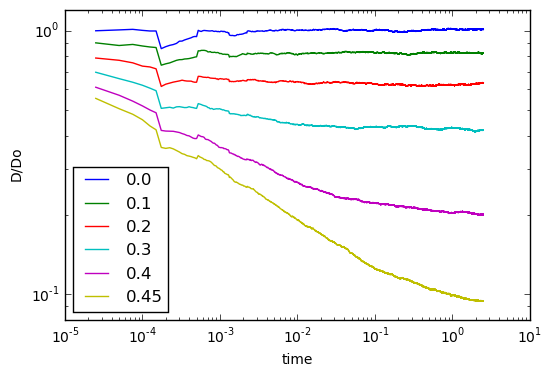

In [26]:
f1,ax1 = plt.subplots(1)
f2,ax2 = plt.subplots(1)

def plotmsd(phi):
    dat = np.loadtxt('data/LSphi'+str(phi)+'/2Dcrowding_LS_phi'+str(phi)+'.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    ax1.plot(t,msd,label=str(phi))
    D = 1
    ax1.plot(t,4*D*t,'g--')
    Dt = msd[1:]/t[1:]/4./D
    ax2.loglog(t[1:],Dt,label=str(phi))
    deff = Dt[(t>1)[1::]]
    return np.mean(deff)

de = []
for p in [0.0,0.1,0.2,0.3,0.4,0.45]:
    mean = plotmsd(p)
    de.append(mean)
    ax1.set_xlabel("time")
    ax1.set_ylabel("MSD")  
    ymin = 0.08
    ymax = 1.2
    ax2.set_ylim(ymin,ymax)
    #ax2.set_yticks(np.arange(ymin,ymax,0.1))
    ax2.set_xlabel("time")
    ax2.set_ylabel("D/Do")    
    ax1.legend(loc='best')
    ax2.legend(loc='best')  


In [16]:
f1.savefig("figure/2D_diffusion_MSD_t.png",format='png',dpi=100)    
f2.savefig("figure/2D_diffusion_Deff_t.png",format='png',dpi=100)

phi [0.0, 0.1, 0.2, 0.3, 0.4, 0.45]
Deff [1.0121178589495134, 0.82429113484185978, 0.62770517074313348, 0.42114285907396631, 0.20321242503673448, 0.095884038361028059]


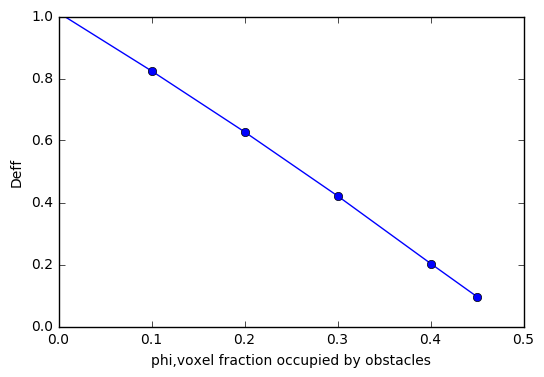

In [18]:
#phir = [0.,0.0906,0.1813,0.272,0.3627]
phir = [0.0,0.1,0.2,0.3,0.4,0.45]
plt.plot(phir,de,'o-')
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
plt.xlim(0,0.5)
plt.ylim(0.0,1)
print 'phi',phir
print 'Deff',de
plt.savefig("figure/2D_diffusion_Deff_phi.png",format='png',dpi=100)